## Average Grain Size Estimation Using Convolutional Neural Network
## Muhammad I'tikafi Khoirul Haq (140710180030)
## Fauzian Dwi Ramadhan (140710180025)
## Fatimah Az-Zahra (140710180021)

## Link Dataset: https://drive.google.com/drive/u/0/folders/1gPwVCFSObajKA555Zf7FuN6WAEfgo6l-

### Import Library

In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import tensorflow as tf

from sklearn.metrics import r2_score

### Load CSV berisi nama file dataset

In [11]:
dataset = pd.read_csv('grain2d.csv')

### Membagi Dataset
80% untuk training (20% untuk validasi)
20% untuk testing

In [12]:
train_df, test_df = train_test_split(dataset, train_size=0.8, shuffle=True, random_state=1)
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


## Load Dataset

In [4]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='nilai',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='nilai',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='nilai',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 640 validated image filenames.
Found 160 validated image filenames.
Found 200 validated image filenames.


In [5]:
print(type(test_images))

<class 'keras.preprocessing.image.DataFrameIterator'>


## Training

In [21]:
## Pengaturan Hyperparameter untuk Model 5
inputs = tf.keras.Input(shape=(128, 128, 3))
## Pengaturan Hyperparameter untuk Model 5
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 64)        16448     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 128)       32896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 128)       0   

In [22]:
start_time = time.process_time()
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)
end_time = time.process_time()

Epoch 1/100
20/20 [==============================] - 41s 2s/step - loss: 1437.3157 - val_loss: 86.2235
Epoch 2/100
20/20 [==============================] - 48s 2s/step - loss: 187.5683 - val_loss: 84.0385
Epoch 3/100
20/20 [==============================] - 54s 3s/step - loss: 109.7431 - val_loss: 84.8204
Epoch 4/100
20/20 [==============================] - 49s 2s/step - loss: 103.1487 - val_loss: 93.5232
Epoch 5/100
20/20 [==============================] - 35s 2s/step - loss: 99.8237 - val_loss: 81.5347
Epoch 6/100
20/20 [==============================] - 35s 2s/step - loss: 95.2550 - val_loss: 80.6070
Epoch 7/100
20/20 [==============================] - 38s 2s/step - loss: 97.4982 - val_loss: 82.1768
Epoch 8/100
20/20 [==============================] - 41s 2s/step - loss: 95.4501 - val_loss: 78.1753
Epoch 9/100
20/20 [==============================] - 36s 2s/step - loss: 92.1468 - val_loss: 79.3375
Epoch 10/100
20/20 [==============================] - 41s 2s/step - loss: 89.9053 - va

### Menyimpan Model

In [23]:
model.save('model/grain_model5.h5')

### Menyimpan History Pelatihan

In [24]:
df = pd.DataFrame(history.history, columns= history.history.keys())
df.to_csv(r'fit_history/grain_hist5.csv', index = False, header=True)

print (df)

           loss   val_loss
0   1437.315674  86.223549
1    187.568253  84.038452
2    109.743080  84.820389
3    103.148666  93.523209
4     99.823662  81.534691
..          ...        ...
70    28.096069  24.689367
71    30.164318  41.870975
72    29.375629  26.005056
73    24.645060  31.005596
74    28.727915  25.446320

[75 rows x 2 columns]


### Plot loss/Val_loss

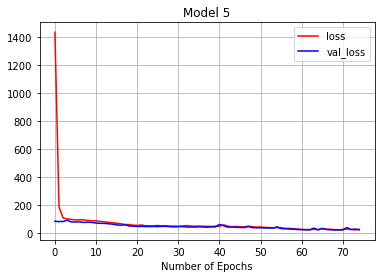

In [25]:
import matplotlib.pyplot as plt
plt.plot(df['loss'], color='r', label="loss")
plt.plot(df['val_loss'], color='b', label="val_loss")
plt.title("Model 5")
plt.xlabel("Number of Epochs")
plt.grid()
plt.legend()
plt.show()

### Menghitung nilai $R^2$

In [6]:
from tensorflow.keras.models import load_model
model = load_model('model/grain_model5.h5', compile = False)

In [7]:
predicted_grain = np.squeeze(model.predict(test_images))
print(type(predicted_grain))

<class 'numpy.ndarray'>


In [13]:
predd = model.predict(test_images)
print(predd.shape)
print(predicted_grain.shape)
print(predicted_grain)

(200, 1)
(200,)
[46.839825 39.889862 50.522636 48.19433  33.9812   49.13382  40.284805
 47.324997 42.796898 42.715553 44.863716 40.602463 46.21978  38.94897
 41.445515 48.013863 48.915245 44.60676  45.37529  46.10013  46.148277
 44.94232  46.8862   40.669346 39.864822 39.80005  43.80522  48.03499
 29.380905 33.511818 48.956795 42.457214 42.189682 44.97569  44.522804
 43.218597 45.02867  43.639915 42.082172 45.46579  44.131927 40.805
 41.48831  43.700928 40.908722 46.95898  42.187935 44.1902   44.04299
 30.228971 36.743103 46.498337 36.83268  45.55864  45.83266  46.716625
 45.089024 45.617355 41.856678 45.257828 40.071896 45.97426  43.330536
 45.79332  45.599403 47.07389  42.871452 40.477425 42.02526  39.90061
 48.34356  45.97379  48.19883  51.628494 43.761795 45.405792 44.896904
 48.828102 41.274895 40.997063 47.05361  45.84381  34.44891  45.40657
 46.913033 21.320217 40.443363 41.873905 38.481655 40.34858  48.58821
 47.19879  43.214905 47.927208 41.95085  41.871468 43.689957 31.827217

In [29]:
predicted_grain = np.squeeze(model.predict(test_images))
true_grain = test_images.labels

r2 = r2_score(true_grain, predicted_grain)
print("Test R^2 Score: {:.5f}".format(r2))

Test R^2 Score: 0.49689


### Menghitung Waktu Pelatihan

In [27]:
waktu = end_time-start_time
print("detik: ", waktu)
print("menit: ",waktu/60)

detik:  4626.96875
menit:  77.11614583333333


In [28]:
print(tf.__version__)

2.6.0
